# Immune Cell

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [2]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Immune-Cells_2D'
sub_folder = ['190718_Tcells','190721_Tcells']
for folder_name in sub_folder:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split('_')[2][1]

                if file_name_end=='.tiff' and fn=='n':
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)

                    mask_dir = os.path.join(current_folder,'Masks',file_name_front+'_cells.tiff')
                    label_list.append(mask_dir)

In [3]:
image_list[0]

'/home/zhangj41/HW/group_proj/Immune-Cells_2D/190718_Tcells/Th2/Tcells_Th2_2n_photons.tiff'

In [4]:
label_list[0]

'/home/zhangj41/HW/group_proj/Immune-Cells_2D/190718_Tcells/Th2/Masks/Tcells_Th2_2n_photons_cells.tiff'

## load and preprocess

In [5]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
    return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
    mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

In [6]:
image_loc,label_loc = image_list[8],label_list[8]
print(image_loc,'\n',label_loc)
print(len(image_list))

/home/zhangj41/HW/group_proj/Immune-Cells_2D/190718_Tcells/Th0/Tcells_Th0_2n_photons.tiff 
 /home/zhangj41/HW/group_proj/Immune-Cells_2D/190718_Tcells/Th0/Masks/Tcells_Th0_2n_photons_cells.tiff
43


In [7]:
cell_img = img_preprocess(img_dir=image_loc)
cell_mask = label_preprocess(mask_dir=label_loc)

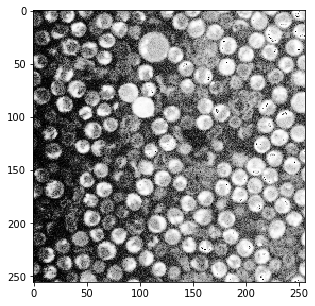

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(cell_img, cmap='gray', vmin=0, vmax=255)

In [9]:
# plt.figure(figsize=(5,5))
# plt.imshow(cell_mask, cmap='gray', vmin=0, vmax=1)

## save patchs as train and test sets

In [10]:
PATCH_SIZE = 64
STRIDE = int(PATCH_SIZE/2)
COUNTER = 0
DATA_DIR = '/home/zhangj41/HW/group_proj/Immune_cell'
mkdir_if_missing(DATA_DIR)

TRAIN_IMG = os.path.join(DATA_DIR,'image_train')
mkdir_if_missing(TRAIN_IMG)

TEST_IMG = os.path.join(DATA_DIR,'image_test')
mkdir_if_missing(TEST_IMG)

TRAIN_MASK = os.path.join(DATA_DIR,'mask_train')
mkdir_if_missing(TRAIN_MASK)

TEST_MASK = os.path.join(DATA_DIR,'mask_test')
mkdir_if_missing(TEST_MASK)
COUNTER_TRAIN = 1700

for ii in np.arange(len(image_list)):
    image_loc,label_loc = image_list[ii],label_list[ii]
    cell_img = img_preprocess(img_dir=image_loc)
    cell_mask = label_preprocess(mask_dir=label_loc)
    for xx in np.arange(7):
        for yy in np.arange(7):
            ix, iy = xx*STRIDE, yy*STRIDE
            COUNTER += 1
            ### training set
            if COUNTER<= COUNTER_TRAIN:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TRAIN_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TRAIN_MASK,str(COUNTER).zfill(5)+'.png'))
            ### test set
            else:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TEST_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TEST_MASK,str(COUNTER).zfill(5)+'.png'))

In [11]:
COUNTER

2107

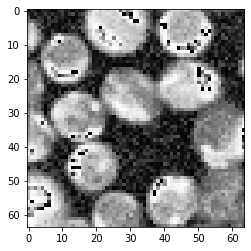

In [12]:
image = imageio.imread(os.path.join(DATA_DIR,TRAIN_IMG,str(1100).zfill(5)+'.png')).astype("uint8")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

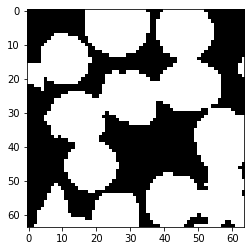

In [13]:
image = imageio.imread(os.path.join(DATA_DIR,TRAIN_MASK,str(1100).zfill(5)+'.png')).astype("uint8")
plt.imshow(image, cmap='gray', vmin=0, vmax=1)

# Immune Nuclei

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [2]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Immune-Cells_2D'
sub_folder = ['190718_Tcells','190721_Tcells']
for folder_name in sub_folder:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split('_')[2][1]

                if file_name_end=='.tiff' and fn=='n':
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)

                    mask_dir = os.path.join(current_folder,'Masks',file_name_front+'_nuclei.tiff')
                    label_list.append(mask_dir)

## load and preprocess

In [3]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
    return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
    mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

## save patchs as train and test sets

In [4]:
PATCH_SIZE = 64
STRIDE = int(PATCH_SIZE/2)
COUNTER = 0
DATA_DIR = '/home/zhangj41/HW/group_proj/Immune_nuclei'
mkdir_if_missing(DATA_DIR)

TRAIN_IMG = os.path.join(DATA_DIR,'image_train')
mkdir_if_missing(TRAIN_IMG)

TEST_IMG = os.path.join(DATA_DIR,'image_test')
mkdir_if_missing(TEST_IMG)

TRAIN_MASK = os.path.join(DATA_DIR,'mask_train')
mkdir_if_missing(TRAIN_MASK)

TEST_MASK = os.path.join(DATA_DIR,'mask_test')
mkdir_if_missing(TEST_MASK)
COUNTER_TRAIN = 1700

for ii in np.arange(len(image_list)):
    image_loc,label_loc = image_list[ii],label_list[ii]
    cell_img = img_preprocess(img_dir=image_loc)
    cell_mask = label_preprocess(mask_dir=label_loc)
    for xx in np.arange(7):
        for yy in np.arange(7):
            ix, iy = xx*STRIDE, yy*STRIDE
            COUNTER += 1
            ### training set
            if COUNTER<= COUNTER_TRAIN:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TRAIN_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TRAIN_MASK,str(COUNTER).zfill(5)+'.png'))
            ### test set
            else:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TEST_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TEST_MASK,str(COUNTER).zfill(5)+'.png'))

In [5]:
COUNTER

2107

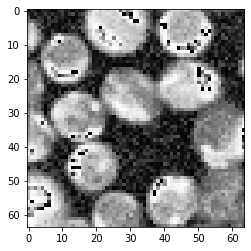

In [6]:
image = imageio.imread(os.path.join(DATA_DIR,TRAIN_IMG,str(1100).zfill(5)+'.png')).astype("uint8")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

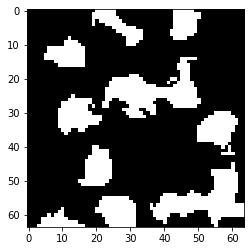

In [7]:
image = imageio.imread(os.path.join(DATA_DIR,TRAIN_MASK,str(1100).zfill(5)+'.png')).astype("uint8")
plt.imshow(image, cmap='gray', vmin=0, vmax=1)

# Immune Cyto

In [8]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [9]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Immune-Cells_2D'
sub_folder = ['190718_Tcells','190721_Tcells']
for folder_name in sub_folder:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split('_')[2][1]

                if file_name_end=='.tiff' and fn=='n':
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)

                    mask_dir = os.path.join(current_folder,'Masks',file_name_front+'_cyto.tiff')
                    label_list.append(mask_dir)

## load and preprocess

In [10]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
    return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
    mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

## save patchs as train and test sets

In [11]:
PATCH_SIZE = 64
STRIDE = int(PATCH_SIZE/2)
COUNTER = 0
DATA_DIR = '/home/zhangj41/HW/group_proj/Immune_cyto'
mkdir_if_missing(DATA_DIR)

TRAIN_IMG = os.path.join(DATA_DIR,'image_train')
mkdir_if_missing(TRAIN_IMG)

TEST_IMG = os.path.join(DATA_DIR,'image_test')
mkdir_if_missing(TEST_IMG)

TRAIN_MASK = os.path.join(DATA_DIR,'mask_train')
mkdir_if_missing(TRAIN_MASK)

TEST_MASK = os.path.join(DATA_DIR,'mask_test')
mkdir_if_missing(TEST_MASK)
COUNTER_TRAIN = 1700

for ii in np.arange(len(image_list)):
    image_loc,label_loc = image_list[ii],label_list[ii]
    cell_img = img_preprocess(img_dir=image_loc)
    cell_mask = label_preprocess(mask_dir=label_loc)
    for xx in np.arange(7):
        for yy in np.arange(7):
            ix, iy = xx*STRIDE, yy*STRIDE
            COUNTER += 1
            ### training set
            if COUNTER<= COUNTER_TRAIN:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TRAIN_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TRAIN_MASK,str(COUNTER).zfill(5)+'.png'))
            ### test set
            else:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TEST_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TEST_MASK,str(COUNTER).zfill(5)+'.png'))

In [12]:
COUNTER

2107

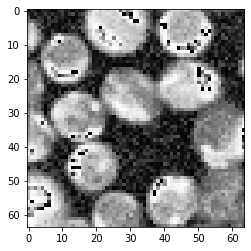

In [13]:
image = imageio.imread(os.path.join(DATA_DIR,TRAIN_IMG,str(1100).zfill(5)+'.png')).astype("uint8")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

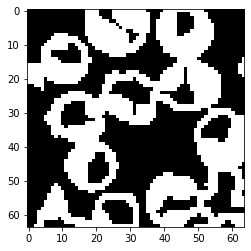

In [14]:
image = imageio.imread(os.path.join(DATA_DIR,TRAIN_MASK,str(1100).zfill(5)+'.png')).astype("uint8")
plt.imshow(image, cmap='gray', vmin=0, vmax=1)

# Organ cell

In [14]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [15]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Organoids_3D'
folder_1st = ['191120_B6.FCAKPK_Folfox','200103_RC18b_XRT']


for folder_name in folder_1st:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split(' ')[1][1]

                if file_name_end=='.tiff' and fn=='n':
                    img_code = file_name_front.split(' ')[1][0]
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)

                    mask_dir = os.path.join(current_folder,'Masks','Cell_mask_0'+str(img_code)+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks','Nuclei_mask_0'+str(img_code)+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks','Mask_image_0'+str(1)+'.tiff')
                    label_list.append(mask_dir)

## load and preprocess

In [16]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
    return image
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
#     return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
    mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

In [17]:
print(len(image_list))
image_loc = image_list[30]
label_loc = label_list[30]
cell_img = img_preprocess(img_dir=image_loc)
cell_mask = label_preprocess(mask_dir=label_loc)

36


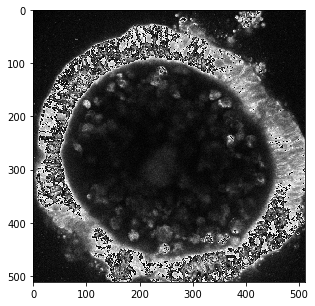

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(cell_img, cmap='gray', vmin=0, vmax=255)

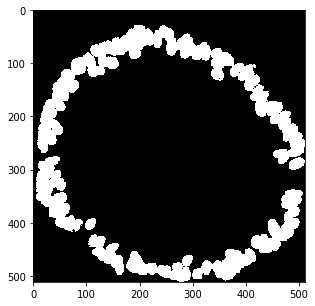

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(cell_mask, cmap='gray', vmin=0, vmax=1)

## save patchs as train and test sets

In [20]:
PATCH_SIZE = 128
STRIDE = int(PATCH_SIZE/2)
COUNTER = 0
DATA_DIR = '/home/zhangj41/HW/group_proj/Organ_cell'
mkdir_if_missing(DATA_DIR)

TRAIN_IMG = os.path.join(DATA_DIR,'image_train')
mkdir_if_missing(TRAIN_IMG)

TEST_IMG = os.path.join(DATA_DIR,'image_test')
mkdir_if_missing(TEST_IMG)

TRAIN_MASK = os.path.join(DATA_DIR,'mask_train')
mkdir_if_missing(TRAIN_MASK)

TEST_MASK = os.path.join(DATA_DIR,'mask_test')
mkdir_if_missing(TEST_MASK)
COUNTER_TRAIN = 1400

for ii in np.arange(len(image_list)):
    image_loc,label_loc = image_list[ii],label_list[ii]
    cell_img = img_preprocess(img_dir=image_loc)
    cell_mask = label_preprocess(mask_dir=label_loc)
    for xx in np.arange(7):
        for yy in np.arange(7):
            ix, iy = xx*STRIDE, yy*STRIDE
            COUNTER += 1
            ### training set
            if COUNTER<= COUNTER_TRAIN:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TRAIN_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TRAIN_MASK,str(COUNTER).zfill(5)+'.png'))
            ### test set
            else:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TEST_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TEST_MASK,str(COUNTER).zfill(5)+'.png'))

# Organ Nuclei

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [2]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Organoids_3D'
folder_1st = ['191120_B6.FCAKPK_Folfox','200103_RC18b_XRT']


for folder_name in folder_1st:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split(' ')[1][1]

                if file_name_end=='.tiff' and fn=='n':
                    img_code = file_name_front.split(' ')[1][0]
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)

                    mask_dir = os.path.join(current_folder,'Masks','Nuclei_mask_0'+str(img_code)+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks','Nuclei_mask_0'+str(img_code)+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks','Mask_image_0'+str(1)+'.tiff')
                    label_list.append(mask_dir)

## load and preprocess

In [3]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
    return image
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
#     return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
    mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

In [4]:
print(len(image_list))
image_loc = image_list[30]
label_loc = label_list[30]
cell_img = img_preprocess(img_dir=image_loc)
cell_mask = label_preprocess(mask_dir=label_loc)

36


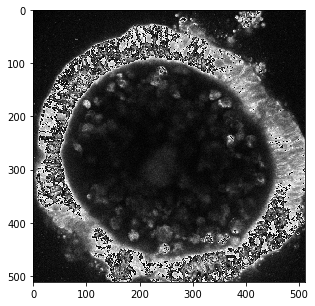

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(cell_img, cmap='gray', vmin=0, vmax=255)

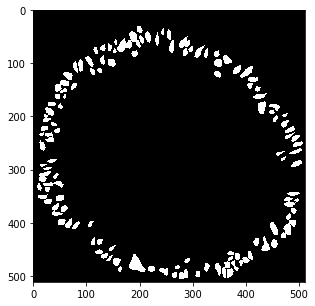

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(cell_mask, cmap='gray', vmin=0, vmax=1)

## save patchs as train and test sets

In [7]:
PATCH_SIZE = 128
STRIDE = int(PATCH_SIZE/2)
COUNTER = 0
DATA_DIR = '/home/zhangj41/HW/group_proj/Organ_nuclei'
mkdir_if_missing(DATA_DIR)

TRAIN_IMG = os.path.join(DATA_DIR,'image_train')
mkdir_if_missing(TRAIN_IMG)

TEST_IMG = os.path.join(DATA_DIR,'image_test')
mkdir_if_missing(TEST_IMG)

TRAIN_MASK = os.path.join(DATA_DIR,'mask_train')
mkdir_if_missing(TRAIN_MASK)

TEST_MASK = os.path.join(DATA_DIR,'mask_test')
mkdir_if_missing(TEST_MASK)
COUNTER_TRAIN = 1400

for ii in np.arange(len(image_list)):
    image_loc,label_loc = image_list[ii],label_list[ii]
    cell_img = img_preprocess(img_dir=image_loc)
    cell_mask = label_preprocess(mask_dir=label_loc)
    for xx in np.arange(7):
        for yy in np.arange(7):
            ix, iy = xx*STRIDE, yy*STRIDE
            COUNTER += 1
            ### training set
            if COUNTER<= COUNTER_TRAIN:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TRAIN_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TRAIN_MASK,str(COUNTER).zfill(5)+'.png'))
            ### test set
            else:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TEST_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TEST_MASK,str(COUNTER).zfill(5)+'.png'))

# Organ Cyto

In [8]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [9]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Organoids_3D'
folder_1st = ['191120_B6.FCAKPK_Folfox','200103_RC18b_XRT']


for folder_name in folder_1st:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split(' ')[1][1]

                if file_name_end=='.tiff' and fn=='n':
                    img_code = file_name_front.split(' ')[1][0]
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)

                    mask_dir = os.path.join(current_folder,'Masks','Mask_image_0'+str(img_code)+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks','Nuclei_mask_0'+str(img_code)+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks','Mask_image_0'+str(1)+'.tiff')
                    label_list.append(mask_dir)

## load and preprocess

In [10]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
    return image
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
#     return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
    mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

In [11]:
print(len(image_list))
image_loc = image_list[30]
label_loc = label_list[30]
cell_img = img_preprocess(img_dir=image_loc)
cell_mask = label_preprocess(mask_dir=label_loc)

36


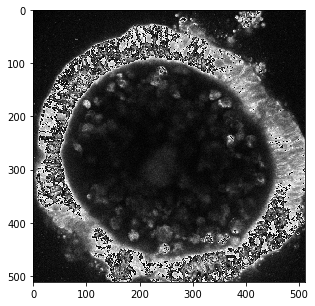

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(cell_img, cmap='gray', vmin=0, vmax=255)

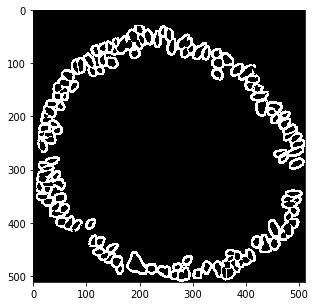

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(cell_mask, cmap='gray', vmin=0, vmax=1)

## save patchs as train and test sets

In [14]:
PATCH_SIZE = 128
STRIDE = int(PATCH_SIZE/2)
COUNTER = 0
DATA_DIR = '/home/zhangj41/HW/group_proj/Organ_cyto'
mkdir_if_missing(DATA_DIR)

TRAIN_IMG = os.path.join(DATA_DIR,'image_train')
mkdir_if_missing(TRAIN_IMG)

TEST_IMG = os.path.join(DATA_DIR,'image_test')
mkdir_if_missing(TEST_IMG)

TRAIN_MASK = os.path.join(DATA_DIR,'mask_train')
mkdir_if_missing(TRAIN_MASK)

TEST_MASK = os.path.join(DATA_DIR,'mask_test')
mkdir_if_missing(TEST_MASK)
COUNTER_TRAIN = 1400

for ii in np.arange(len(image_list)):
    image_loc,label_loc = image_list[ii],label_list[ii]
    cell_img = img_preprocess(img_dir=image_loc)
    cell_mask = label_preprocess(mask_dir=label_loc)
    for xx in np.arange(7):
        for yy in np.arange(7):
            ix, iy = xx*STRIDE, yy*STRIDE
            COUNTER += 1
            ### training set
            if COUNTER<= COUNTER_TRAIN:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TRAIN_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TRAIN_MASK,str(COUNTER).zfill(5)+'.png'))
            ### test set
            else:
                ### training image patch
                img_patch = cell_img[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                img_patch = Image.fromarray(img_patch)
                img_patch.save(os.path.join(TEST_IMG,str(COUNTER).zfill(5)+'.png'))
                ### training mask patch
                mask_patch = cell_mask[ix:ix+PATCH_SIZE, iy:iy+PATCH_SIZE]
                mask_patch = Image.fromarray(mask_patch)
                mask_patch.save(os.path.join(TEST_MASK,str(COUNTER).zfill(5)+'.png'))

# Adherent cell

In [21]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

from PIL import Image

def mkdir_if_missing(save_dir):
    if os.path.exists(save_dir):
        return 1
    else:
        os.makedirs(save_dir)
        return 0

## image and mask lists

In [22]:
image_list = []
label_list = []

home_dir = '/home/zhangj41/HW/group_proj/Adherent-Cells_2D'
folder_1st = ['190605_HeLa_Confluency','190612_MCF10A_Confluency','190703_MCF7_Confluency','190822_IMR90_Confluency']

for folder_name in folder_1st:
    all_dir = os.path.join(home_dir,folder_name)
    all_folder = os.listdir(all_dir)
    for folder in all_folder:
    # folder = all_folder[3]
        current_folder = os.path.join(all_dir, folder)
        all_images = os.listdir(current_folder)
        for file_name in all_images:
            # file_name = all_images[3]
            file_name_front, file_name_end = os.path.splitext(file_name)
            if file_name_end is not '':
                fn = file_name_front.split('_')[3][1]

                if file_name_end=='.tiff' and fn=='n':
                    image_dir = os.path.join(current_folder,file_name)
                    image_list.append(image_dir)
                    mask_dir = os.path.join(current_folder,'Masks',file_name_front+'cyto'+'.tiff')
#                     mask_dir = os.path.join(current_folder,'Masks',file_name_front+'celllocation'+'.tiff')
                    if os.path.exists(mask_dir) is not True:
                        mask_dir = os.path.join(current_folder,'Masks',file_name_front+'cyto'+'.tif')
#                         mask_dir = os.path.join(current_folder,'Masks',file_name_front+'celllocation'+'.tif')
                    label_list.append(mask_dir)

##  load and preprocess

In [23]:
def img_preprocess(img_dir):
    image = imageio.imread(img_dir).astype("uint8")
    hist, bins = np.histogram(image, bins=256, range=[0,256])
    cum_hist = np.cumsum(hist)
    height, width = image.shape
    norm_cum_hist = cum_hist / (height * width)
    hists_cdf = (norm_cum_hist * 255).astype("uint8")
    # mapping
    img_eq = hists_cdf[image]
    return image
#     plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
#     return img_eq


def label_preprocess(mask_dir):
    mask = imageio.imread(mask_dir).astype('uint8')
#     mask[mask>0] = 1
#     plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    return mask

In [24]:
print(len(image_list))
image_loc = image_list[110]
label_loc = label_list[110]
cell_img = img_preprocess(img_dir=image_loc)
cell_mask = label_preprocess(mask_dir=label_loc)

267


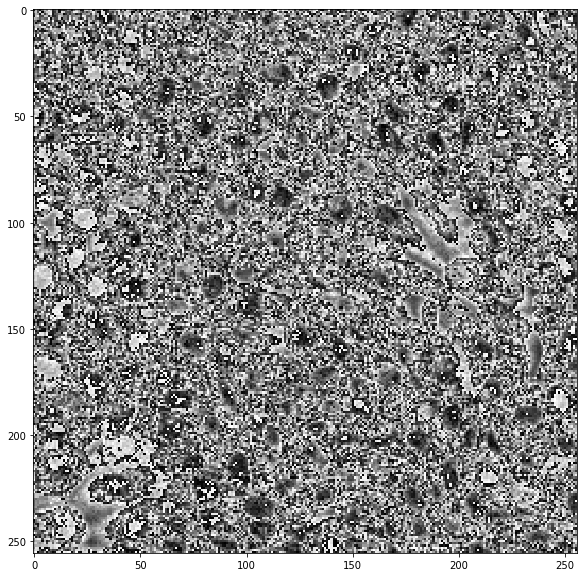

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(cell_img, cmap='gray', vmin=0, vmax=255)

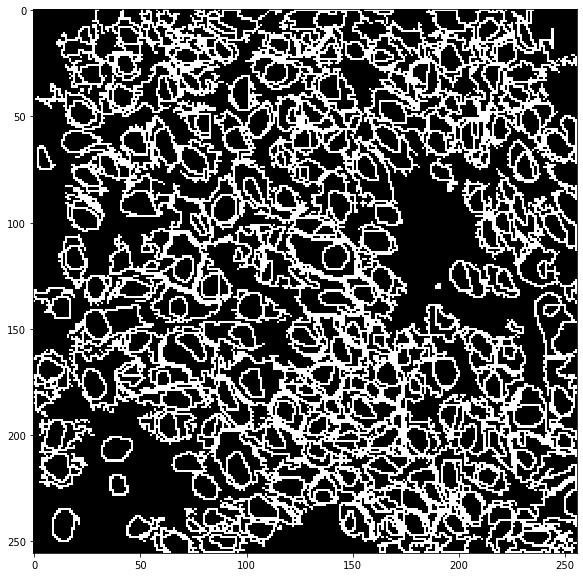

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(cell_mask, cmap='gray', vmin=0, vmax=1)